In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

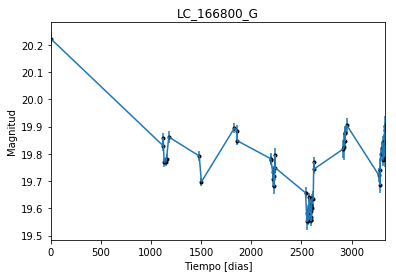

In [2]:
data = np.genfromtxt('LC_166800_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_166800_G')
plt.savefig("LC_166800_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

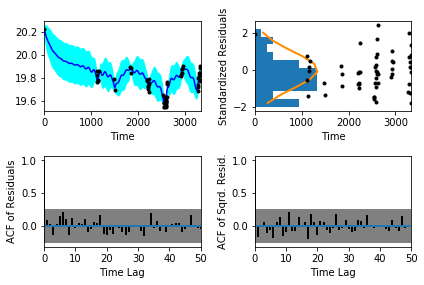

In [5]:
sample.assess_fit()

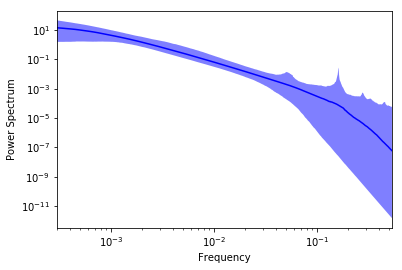

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

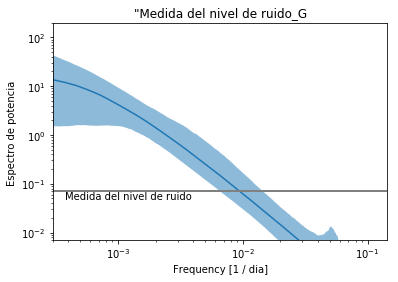

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_166800_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_166800_G')

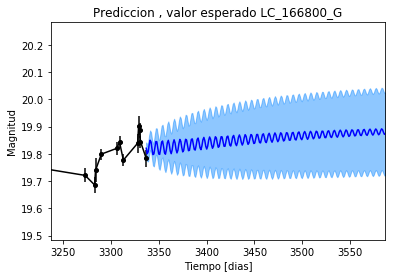

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_166800_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_166800_G')

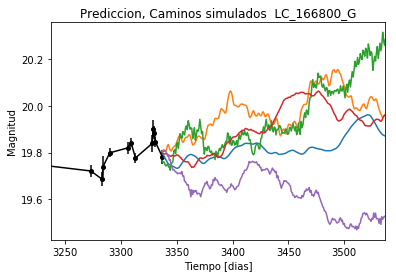

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_166800_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


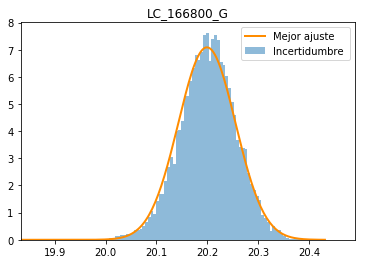

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_166800_G')
plt.savefig("Mejor_ajuste_LC_166800_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_166800_G')

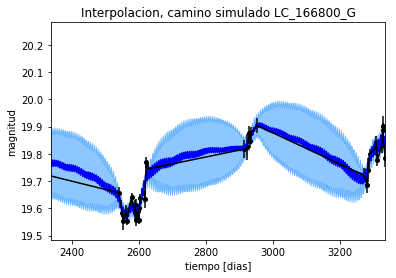

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_166800_G')

Text(0.5,1,'Interpolacion, camino simulado LC_166800_G')

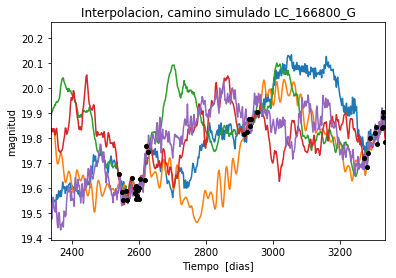

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_166800_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 2626.1964698
Median: 0.0238487462774
Standard deviation: 0.196475053804
68% credibility interval: [ 0.0022004   0.18929897]
95% credibility interval: [  5.13189312e-04   7.80784624e-01]
99% credibility interval: [  3.59541856e-04   1.02862336e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 809.167623862
Median: 0.0161564192262
Standard deviation: 0.130309988919
68% credibility interval: [ 0.00135085  0.10127831]
95% credibility interval: [  4.44234380e-04   4.86553119e-01]
99% credibility interval: [  3.30248399e-04   8.26383530e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 475.663592069
Median: 0.127125081127
Sta

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1000.81435074
Median: 106.818490089
Standard deviation: 1.96224656367
68% credibility interval: [ 104.8346592   108.27294705]
95% credibility interval: [ 102.28777027  110.46892815]
99% credibility interval: [ 100.15505404  111.84076137]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 363.863287784
Median: 1.61106959679
Standard deviation: 2.72053604048
68% credibility interval: [ 0.32943447  5.56390509]
95% credibility interval: [ 0.10816658  9.77419997]
99% credibility interval: [  0.04992849  12.80661813]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 535.661374526
Median: 4.23027439225
Standard deviation: 14.0153337977
68% credibility interval: [  0.72724792  26.0513291 ]
95% credibility interval: [  0.10035163 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 816.756309246
Median: 5.41448354691e-62
Standard deviation: 1.63720237161e+15
68% credibility interval: [  4.58554943e-94   1.28502637e-31]
95% credibility interval: [  1.61842084e-113   1.56720665e-004]
99% credibility interval: [  4.14323874e-128   1.55775523e+014]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1907.39036637
Median: 19.8623855821
Standard deviation: 0.0857937247003
68% credibility interval: [ 19.79287051  19.95229896]
95% credibility interval: [ 19.71769213  20.06074977]
99% credibility interval: [ 19.65417462  20.1464904 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 440.712837032
Median: 0.174754217293
Standard deviation: 0.310472330703
68% credibility interval: [ 0.03384776  0.71941991]
95% credibility interval: [ 0.          1.00792231]
99% credibility interval: [ 0.          1.05846735]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 440.712837032
Median: 0.174754217293
Standard deviation: 0.310472330703
68% credibility interval: [ 0.03384776  0.71941991]
95% credibility interval: [ 0.          1.00792231]
99% credibility interval: [ 0.          1.05846735]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2774.32052363
Median: 0.0
Standard deviation: 0.000465692486589
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1000.81435074
Median: 106.818490089
Standard deviation: 1.96224656367
68% credibility interval: [ 104.8346592   108.27294705]
95% credibility interval: [ 102.28777027  110.46892815]
99% credibility interval: [ 100.15505404  111.84076137]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1016.75535689
Median: 0.0329347928549
Standard deviation: 0.0179111253509
68% credibility interval: [ 0.02076547  0.05148456]
95% credibility interval: [ 0.01315406  0.08113601]
99% credibility interval: [ 0.010188   0.1048976]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 860.081940524
Median: 1.06878173581
Standard deviation: 0.213455324012
68% credibility interval: [ 0.88335063  1.29187553]
95% credibility interval: [ 0.73785814  1.57766729]
99% credibility interval: [ 0.67061091  1.78098491]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 542.507334914
Median: 0.0326355914492
Standard deviation: 0.481252355821
68% credibility interval: [ 0.0022833   0.34010742]
95% credibility interval: [  8.31732451e-05   1.71682462e+00]
99% credibility interval: [  1.20461500e-16   2.95822147e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 2626.1964698
Median: (-0.149846092205-2.96143897294j)
Standard deviation: 2.30855134487
68% credibility interval: [-1.18940053+0.j         -0.01382550-2.62614316j]
95% credibility interval: [ -4.90581448e+00-5.69191938j  -3.22446354e-03-1.02392236j]
99% credibility interval: [ -6.46303121e+00+0.j          -2.25906811e-03-0.99398752j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 809.167623862
Median: (-0.101513775899+1.49471156617j)
Standard deviation: 2.1156126053
68% credibility interval: [-0.63635041+3.40587243j -0.00848763+0.66480455j]
95% credibility interval: [ -3.05710341e+00+0.89593426j  -2.79120693e-03+2.06967221j]
99% credibility interval: [ -5.19232086e+00+4.00507512j  -2.07501189e-03+0.30792921j]
Posterio